# 1. Import the required libraries

In [195]:
#Importing nesessary libraries for Deep Feed Forward NN and Visualization.
!pip install tensorflow-gpu==2.0.0-beta0 > /dev/null 2>&1

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
import sklearn.metrics as metrics

print("TensorFlow executing eagerly: {}".format(tf.executing_eagerly()))

TensorFlow executing eagerly: True


# 2. Data Acquisition  -- Score: 0.5 Mark

For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL



In [196]:
##---------Type the code below this line------------------##
# Importing Fashion MNist dataset from tensorflow
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 2.1 Write your observations from the above.

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label.



In [197]:
# Printing shape of training data
x_train.shape

(60000, 28, 28)

In [198]:
# Printing shape of training labels
y_train.shape

(60000,)

In [199]:
# Printing shape of test data
x_test.shape

(10000, 28, 28)

In [200]:
# Printing shape of test labels
y_test.shape

(10000,)

**1. Size of the dataset:**
The Fashion MNIST dataset consists of a total of 70,000 greyscale images and their corresponding labels. This dataset is divided into 60,000 training images and 10,000 test images.

**2. Type of data attributes:**
The data attributes in the Fashion MNIST dataset are the greyscale images themselves. Each image is represented as a matrix of pixel values, where the intensity of each pixel represents the darkness or lightness of that particular pixel.

**3. What is being classified:**
The goal of the task is to train a classifier to identify the class value, which refers to the type of fashion item depicted in the image. The classifier is trained using the 60,000 training images and their corresponding labels. The aim is to predict the class value of the fashion item given a new image that the model has not seen before.

**4. Plot the distribution of the categories of the target / label.**

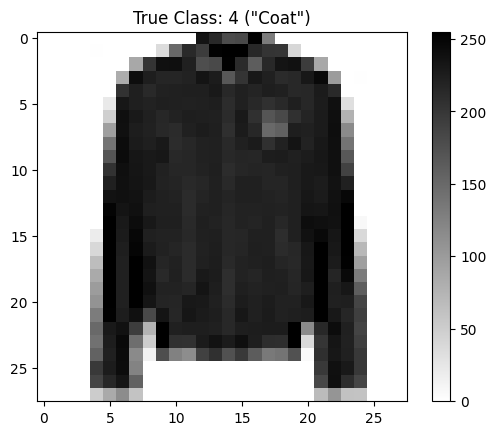

In [201]:
# Plotting data to visualise an image selected at random from the training set
plt.figure()
random_index = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_index], cmap='gray_r')
plt.colorbar()
numerical_label = y_train[random_index]
text_description = text_labels[numerical_label]
plt.title('True Class: {} ("{}")'.format(numerical_label, text_description))

plt.gca().grid(False)

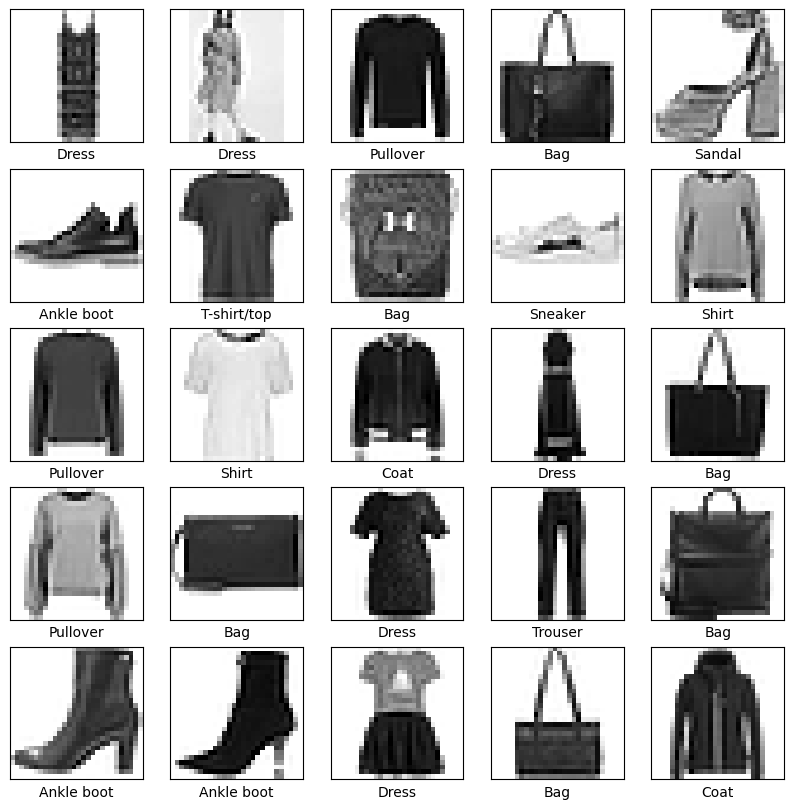

In [202]:
# Plotting data to visualise 25 randomly selected image from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    img_index = np.random.randint(0, 50000)
    plt.imshow(x_train[img_index], cmap="gray_r")
    plt.xlabel(text_labels[y_train[img_index]])

# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

In [203]:
# Normalization: The pixel values range from 0 to 255 for each color channel (assuming 8-bit color depth).
# Dividing each pixel value by 255 scales the values to a range between 0 and 1. This normalization process helps to
# standardize the input data, making it easier for the neural network to learn and generalize patterns effectively
x_train = x_train.astype('float32')/255

x_test = x_test.astype('float32')/255


In [204]:
x_train.shape

(60000, 28, 28)

In [205]:
x_test.shape

(10000, 28, 28)

## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





In [206]:
##---------Type the code below this line------------------##
y_train_onehot = to_categorical(y_train[0:9])
y_test_onehot = to_categorical(y_test[0:9])


In [207]:
y_train_onehot

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [208]:
y_test_onehot

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

## 3.3 Split the data into training set and testing set

In [209]:
##---------Type the code below this line------------------##
# Data is already split while importing it in Section 1. Printing it here.
print(x_train)
print(y_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[9 0 0 ...

## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present
* to encode categorical data
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


In [210]:
##---------Type the answer below this line------------------##
# Normalization is done in section 3.1.
x_train.shape

(60000, 28, 28)

In [211]:
x_test.shape

(10000, 28, 28)

In [212]:
y_train_onehot.shape

(9, 10)

In [213]:
y_test_onehot.shape

(9, 10)

# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN.

**This is our first feedforward neural network model which has the following structure:**

**Input Layer:** The input layer takes **28x28-dimensional images** and flattens them into a 784-dimensional vector.

**Hidden Layers:** The model has two hidden layers, each consisting of 128 neurons. The **activation function used in these layers is the Rectified Linear Unit (ReLU)**, which introduces non-linearity and helps the network learn complex patterns in the data.

**Output Layer:** The output layer consists of 10 neurons, representing the 10 possible classes (digits 0-9) in a multi-class classification problem. The activation function used in this layer is the **softmax function**, which normalizes the output into a probability distribution over the classes, allowing the model to predict the class probabilities for a given input.

**Architecture Summary:** this model architecture will do image classification, where the goal is to classify input images into different categories. The model takes the flattened image as input, processes it through the hidden layers, and produces class probabilities as output using the softmax activation in the final layer.

In [214]:
##---------Type the code below this line------------------##
# First model with 4 layers consisting of 1 Input layer, 2 hidden layers and 1 Output Layer
model = tf.keras.Sequential([
    # Convert the 28x28 image into a flat vector of 28x28 = 784 values
    tf.keras.layers.Flatten(input_shape=(28, 28), name='flatten_input'),
    # Create a "hidden" layer with 128 neurons and apply the ReLU non-linearity
    tf.keras.layers.Dense(128, activation=tf.nn.relu, name='input_to_hidden1'),
    # Create another hidden layer with 128 neurons
    tf.keras.layers.Dense(128, activation=tf.nn.relu, name='hidden1_to_hidden2'),
    # Create an "output layer" with 10 neurons
    tf.keras.layers.Dense(10,activation='softmax', name='output'),
])

## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters



In [215]:
##---------Type the answer below this line------------------##
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_input (Flatten)     (None, 784)               0         
                                                                 
 input_to_hidden1 (Dense)    (None, 128)               100480    
                                                                 
 hidden1_to_hidden2 (Dense)  (None, 128)               16512     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [216]:
# Common function "nn_model_training" which trains the model based on training and test data
# Return Value: Training_losses, Training_Accuracy, Test Losses, Test Accuracy
def nn_model_training(model):
  ##---------Type the code below this line------------------##

    train_losses = []
    train_accuracy = []

    test_losses = []
    test_accuracy = []

    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    fold = 1

    for train_index, test_index in kfold.split(x_train):
        print(f"Fold: {fold}")
        X_train, X_test = x_train[train_index], x_train[test_index]
        Y_train, Y_test = y_train[train_index], y_train[test_index]


        # Train the model
        history_train = model.fit(X_train, Y_train, epochs=20, batch_size=256, validation_data=(X_test, Y_test))
        # model.fit(X_train, Y_train, epochs=20)
        history_test = model.evaluate(X_test, Y_test)
        print(history_test)
        # Store training loss and accuracy for each epoch
        train_losses.append(history_train.history['loss'])
        train_accuracy.append(history_train.history['accuracy'])

        test_losses.append(history_test[0])
        test_accuracy.append(history_test[1])

        fold += 1
    return train_losses, train_accuracy, test_losses, test_accuracy

In [217]:
##---------Type the code below this line------------------##
# Optimizer: Using SGD (Stochastic Gradient Descent) as a optimizer for our model, which is a widely used optimization algorithm for training neural networks.
# SGD updates the model's weights iteratively based on the gradients computed from a subset of training data (mini-batch) at each step.
# Loss Function: Using loss function as SparseCategoricalCrossentropy. This loss function is appropriate for multi-class classification problems
# where the target labels are integers (sparse representation) and the model's output is in the form of logits (raw output values from the last layer).
# The loss function calculates the discrepancy between the predicted probabilities and the true labels, providing a measure of how well the model is performing during training.

optimizer = tf.keras.optimizers.SGD()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [218]:
# Calling API "nn_model_training" to train the model.
train_losses, train_accuracy, test_losses, test_accuracy = nn_model_training(model)

Fold: 1
Epoch 1/20
188/188 [==============================] - 2s 5ms/step - loss: 1.5634 - accuracy: 0.5603 - val_loss: 1.0624 - val_accuracy: 0.6684
Epoch 2/20
188/188 [==============================] - 1s 4ms/step - loss: 0.8958 - accuracy: 0.7070 - val_loss: 0.8089 - val_accuracy: 0.7193
Epoch 3/20
188/188 [==============================] - 1s 4ms/step - loss: 0.7419 - accuracy: 0.7530 - val_loss: 0.7159 - val_accuracy: 0.7625
Epoch 4/20
188/188 [==============================] - 1s 5ms/step - loss: 0.6674 - accuracy: 0.7812 - val_loss: 0.6555 - val_accuracy: 0.7819
Epoch 5/20
188/188 [==============================] - 1s 4ms/step - loss: 0.6178 - accuracy: 0.7976 - val_loss: 0.6106 - val_accuracy: 0.8008
Epoch 6/20
188/188 [==============================] - 1s 4ms/step - loss: 0.5828 - accuracy: 0.8082 - val_loss: 0.5857 - val_accuracy: 0.8043
Epoch 7/20
188/188 [==============================] - 1s 4ms/step - loss: 0.5569 - accuracy: 0.8147 - val_loss: 0.5589 - val_accuracy: 0.813

Justify your choice of optimizers and regulizations used and the hyperparameters tuned


In [219]:
##---------Type the answers below this line------------------##
# Justification added in below text box



**Justification for the choice of optimizer and regularization:**

**Optimizer:**
We have selected Stochastic Gradient Descent (SGD) as the optimizer. SGD is a widely used optimization algorithm
as it updates the model's parameters by computing gradients on small batches of data, making it computationally efficient
for large datasets. SGD performs well for convex and non-convex optimization problems, making it a reasonable choice for training neural networks.

**Loss Function:**
The chosen loss function is SparseCategoricalCrossentropy. This loss function is commonly used for multi-class classification problems
where the classes are mutually exclusive (i.e., each instance belongs to only one class). It calculates the cross-entropy loss between
the true labels and the predicted probabilities.

**Hyperparameters Tuned:**

**1. No of hidden layers:** We have used 2 hidden layers in our model based on complexity of the problem. The Fashion MNIST dataset consists of 10 classes, representing different types of clothing items. While it is a multi-class classification problem, it is not overly complex compared to some other image recognition tasks. The dataset contains grayscale images of size 28x28 pixels, resulting in relatively low-dimensional input data. Therefore, using a more shallow architecture with two hidden layers can still provide sufficient capacity to learn the patterns and variations in the data.

**2. No of neurons in hidden layer:**
Choosing 128 neurons strikes a balance between model capacity and computational efficiency. It provides a moderate level of model complexity without overwhelming the available resources.

For other hyperparameters, default values provided by Keras will be used.
we will experiment with different optimizers (e.g., Adam, RMSprop) and adjusting their hyperparameters (e.g., learning rate, momentum). in next sections.


# 6. Test the model - 0.5 marks


In [221]:
# Test the model using test data and printing accuracy percent

from sklearn.metrics import accuracy_score
y_predict = model.predict(x_test)
y_pred_classes = np.argmax(y_predict, axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
print("Validation Accuracy:", f"{accuracy*100:.2f}%")

313/313 [==============================] - 1s 2ms/step
Validation Accuracy: 86.41%


# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


In [222]:
def plot_Training_Accuracy_And_Losses(accuracy, losses, model_arch):
  ##---------Type the code below this line------------------##
    # Plot the training loss and accuracy for each fold
    plt.figure(figsize=(10, 4))

    # Plot training loss for each fold
    plt.subplot(1, 2, 1)
    for i, loss in enumerate(losses):
        plt.plot(loss, label=f"Fold {i+1}")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(model_arch+' - Training Loss for Each Fold')
    plt.legend()

    # Plot training accuracy for each fold
    plt.subplot(1, 2, 2)
    for i, accuracy in enumerate(accuracy):
        plt.plot(accuracy, label=f"Fold {i+1}")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(model_arch+' - Training Accuracy for Each Fold')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [223]:
def plot_Test_Accuracy_And_Losses(accuracy, losses, model_arch):
  # Plot the training and test loss and accuracy for each fold
    plt.figure(figsize=(10, 4))

    # Plot test loss for each fold
    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(losses) + 1), losses)
    plt.xlabel('No. of Fold')
    plt.ylabel('Loss')
    plt.title(model_arch+' - Test loss')
    print("Validation: Losses for 5 Folds")
    print(losses)

    plt.figure(figsize=(10, 4))

    print("Validation: Accuracy for 5 Folds")
    print(accuracy)
    # Plot test loss for each fold
    plt.subplot(1, 2, 2)
    plt.bar(range(1, len(accuracy) + 1), accuracy)
    plt.xlabel('Fold')
    plt.title(model_arch+' - Test accuracy')


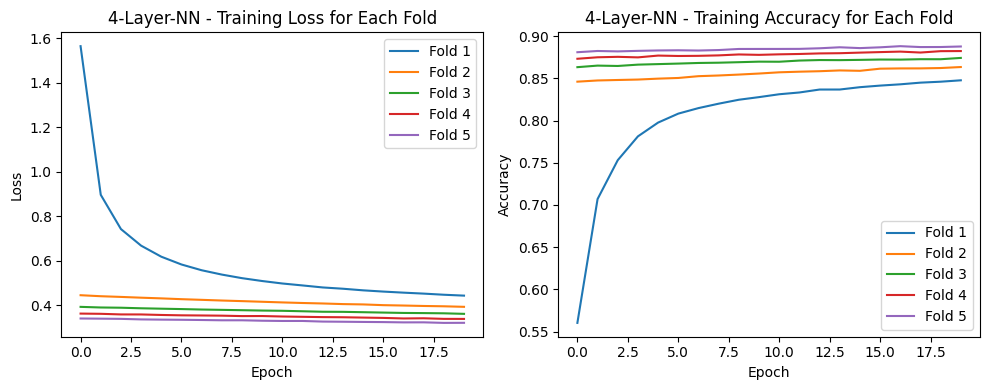

In [224]:
plot_Training_Accuracy_And_Losses(train_accuracy, train_losses, '4-Layer-NN')

Validation: Losses for 5 Folds
[0.4532544016838074, 0.39059939980506897, 0.37025150656700134, 0.3463229835033417, 0.334875226020813]
Validation: Accuracy for 5 Folds
[0.8403333425521851, 0.8666666746139526, 0.8738333582878113, 0.8764166831970215, 0.8820000290870667]


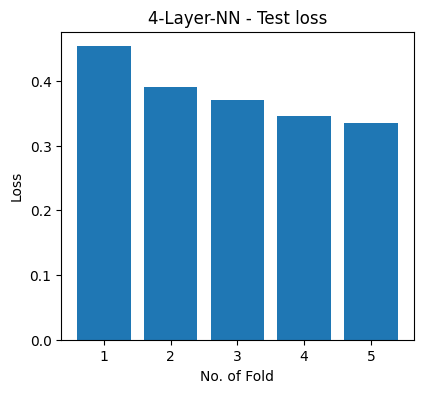

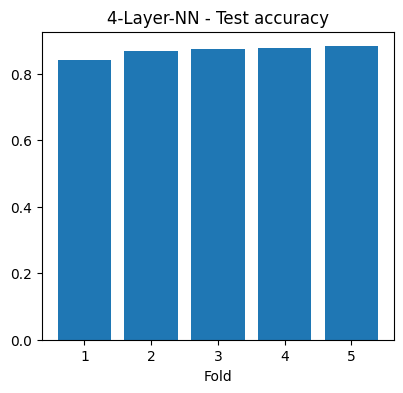

In [225]:
plot_Test_Accuracy_And_Losses(test_accuracy, test_losses, '4-Layer-NN')

Confusion Matrix:
[[836   1  27  49   7   1  67   0  12   0]
 [  3 960   5  25   4   0   2   0   1   0]
 [ 16   3 829   8 106   1  33   0   4   0]
 [ 24  11  19 881  38   0  21   0   6   0]
 [  0   0 115  30 815   0  34   0   6   0]
 [  0   0   0   1   0 943   0  36   3  17]
 [152   2 132  42 109   1 540   0  22   0]
 [  0   0   0   0   0  31   0 926   0  43]
 [  4   1   9   9   6   2   7   5 957   0]
 [  0   0   0   0   0  11   0  34   1 954]]


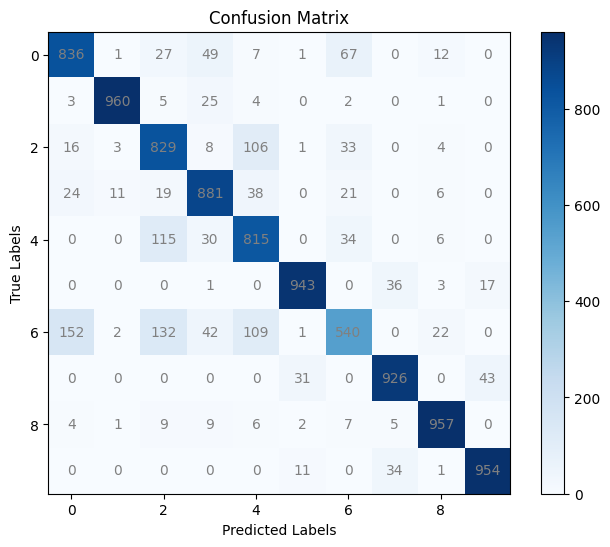

Accuracy: 0.8641
Precision: 0.8644418564865531
Recall: 0.8641
F1 Score: 0.8617643983651561


In [226]:
# Convert the predictions to labels
predicted_labels = np.argmax(y_predict, axis=1)

# Convert true labels to numpy array
true_labels = np.array(y_test)

# Compute confusion matrix
confusion_matrix = metrics.confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_matrix)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, cmap='Blues')

# Add labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Add colorbar
plt.colorbar()

# Add text annotations
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[i])):
        plt.text(j, i, str(confusion_matrix[i][j]), ha='center', va='center', color='grey')

# Show the plot
plt.show()

# Compute performance metrics
accuracy = metrics.accuracy_score(true_labels, predicted_labels)
precision = metrics.precision_score(true_labels, predicted_labels, average='weighted')
recall = metrics.recall_score(true_labels, predicted_labels, average='weighted')
f1_score = metrics.f1_score(true_labels, predicted_labels, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



**8.1 Modified architecture by decreasing one hidden layer**- *3-LAYER-ARCHITECHTURE*

In [227]:
##---------Type the code below this line------------------##
# The updated model now consists of an input layer, a single hidden layer, and an output layer.Here's a breakdown of the architecture:

# Input Layer: The input layer remains the same, taking 28x28-dimensional images and flattening them into a 784-dimensional vector.
# One Hidden Layer: Previously, there were two hidden layers, but now there is only one hidden layer. It consists of a Dense layer with 128 neurons,
# and the activation function used in this layer is still the Rectified Linear Unit (ReLU). This hidden layer helps the model learn and capture complex patterns in the input data.
# Output Layer: The output layer remains unchanged, consisting of 10 neurons representing the 10 possible classes in the classification problem.
# The activation function used is still softmax, which produces a probability distribution over the classes.

model_3l = tf.keras.Sequential([
    # Convert the 28x28 image into a flat vector of 28x28 = 784 values
    tf.keras.layers.Flatten(input_shape=(28, 28), name='flatten_input'),
    # Create a "hidden" layer with 128 neurons and apply the ReLU non-linearity
    tf.keras.layers.Dense(128, activation=tf.nn.relu, name='input_to_hidden1'),
    # Create an "output layer" with 10 neurons
    tf.keras.layers.Dense(10,activation='softmax', name='output'),
])

In [228]:
# Printing Model Summary for 3 layer Model
model_3l.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_input (Flatten)     (None, 784)               0         
                                                                 
 input_to_hidden1 (Dense)    (None, 128)               100480    
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [229]:
# Optimizer: Using SGD (Stochastic Gradient Descent) as a optimizer for our model.
# Loss Function: Using loss function as SparseCategoricalCrossentropy. This loss function is appropriate for multi-class classification problems.

model_3l.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [230]:
# Training the Model. Graph Will be plotted after having all models data available.
train_losses_3l, train_accuracy_3l, test_losses_3l, test_accuracy_3l = nn_model_training(model_3l)

Fold: 1
Epoch 1/20
188/188 [==============================] - 1s 5ms/step - loss: 1.4747 - accuracy: 0.5516 - val_loss: 1.0452 - val_accuracy: 0.6781
Epoch 2/20
188/188 [==============================] - 1s 4ms/step - loss: 0.9045 - accuracy: 0.7154 - val_loss: 0.8277 - val_accuracy: 0.7354
Epoch 3/20
188/188 [==============================] - 1s 4ms/step - loss: 0.7644 - accuracy: 0.7549 - val_loss: 0.7366 - val_accuracy: 0.7624
Epoch 4/20
188/188 [==============================] - 1s 4ms/step - loss: 0.6942 - accuracy: 0.7753 - val_loss: 0.6846 - val_accuracy: 0.7764
Epoch 5/20
188/188 [==============================] - 1s 4ms/step - loss: 0.6494 - accuracy: 0.7895 - val_loss: 0.6438 - val_accuracy: 0.7914
Epoch 6/20
188/188 [==============================] - 1s 4ms/step - loss: 0.6171 - accuracy: 0.7997 - val_loss: 0.6177 - val_accuracy: 0.7997
Epoch 7/20
188/188 [==============================] - 1s 4ms/step - loss: 0.5927 - accuracy: 0.8067 - val_loss: 0.5946 - val_accuracy: 0.803

**8.2 Modified architecture by increasing one hidden layer**- *5-LAYER-ARCHITECHTURE*

In [231]:
##---------Type the code below this line------------------##
# Input Layer: The input layer takes 28x28-dimensional images and flattens them into a 784-dimensional vector using the Flatten layer.
# Hidden Layers: The model has three hidden layers.The first hidden layer consists of a Dense layer with 128 neurons.The activation function is Rectified Linear Unit (ReLU).
# The second hidden layer consists of a Dense layer with 64 neurons and ReLU activation.
# The third hidden layer consists of a Dense layer with 32 neurons and ReLU activation.
# These hidden layers progressively reduce the number of neurons, potentially capturing more abstract and higher-level features as the information flows through the network.
# Output Layer: The output layer consists of a Dense layer with 10 neurons, representing the 10 possible classes in a multi-class classification problem.
# The activation function used in the output layer is softmax, which produces a probability distribution over the classes.

model_5l = tf.keras.Sequential([
    # Convert the 28x28 image into a flat vector of 28x28 = 784 values
    tf.keras.layers.Flatten(input_shape=(28, 28), name='flatten_input'),
    # Create a "hidden" layer with 128 neurons and apply the ReLU non-linearity
    tf.keras.layers.Dense(128, activation=tf.nn.relu, name='input_to_hidden1'),
    # Create another hidden layer with 64 neurons
    tf.keras.layers.Dense(64, activation=tf.nn.relu, name='hidden1_to_hidden2'),
    # Create another hidden layer with 32 neurons
    tf.keras.layers.Dense(32, activation=tf.nn.relu, name='hidden2_to_hidden3'),
    # Create an "output layer" with 10 neurons
    tf.keras.layers.Dense(10, activation='softmax', name='output'),
])

In [232]:
# Printing Model Summary for 5 layer Model
model_5l.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_input (Flatten)     (None, 784)               0         
                                                                 
 input_to_hidden1 (Dense)    (None, 128)               100480    
                                                                 
 hidden1_to_hidden2 (Dense)  (None, 64)                8256      
                                                                 
 hidden2_to_hidden3 (Dense)  (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [233]:
# Optimizer: Using SGD (Stochastic Gradient Descent) as a optimizer for our model.
# Loss Function: Using loss function as SparseCategoricalCrossentropy. This loss function is appropriate for multi-class classification problems.
model_5l.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [234]:
# Training the 5 layer model
train_losses_5l, train_accuracy_5l, test_losses_5l, test_accuracy_5l = nn_model_training(model_5l)

Fold: 1
Epoch 1/20
188/188 [==============================] - 2s 6ms/step - loss: 1.6134 - accuracy: 0.4787 - val_loss: 1.0733 - val_accuracy: 0.6637
Epoch 2/20
188/188 [==============================] - 1s 7ms/step - loss: 0.8913 - accuracy: 0.6891 - val_loss: 0.7968 - val_accuracy: 0.7132
Epoch 3/20
188/188 [==============================] - 1s 6ms/step - loss: 0.7359 - accuracy: 0.7366 - val_loss: 0.7075 - val_accuracy: 0.7603
Epoch 4/20
188/188 [==============================] - 1s 4ms/step - loss: 0.6655 - accuracy: 0.7701 - val_loss: 0.6490 - val_accuracy: 0.7785
Epoch 5/20
188/188 [==============================] - 1s 4ms/step - loss: 0.6170 - accuracy: 0.7878 - val_loss: 0.6092 - val_accuracy: 0.7944
Epoch 6/20
188/188 [==============================] - 1s 4ms/step - loss: 0.5847 - accuracy: 0.7996 - val_loss: 0.5799 - val_accuracy: 0.8023
Epoch 7/20
188/188 [==============================] - 1s 4ms/step - loss: 0.5584 - accuracy: 0.8096 - val_loss: 0.5600 - val_accuracy: 0.809

**Training and Validation Accuracy comparison of 4.1(4-Layers), 8.1(3-layers) and 8.2(5-Layers)**

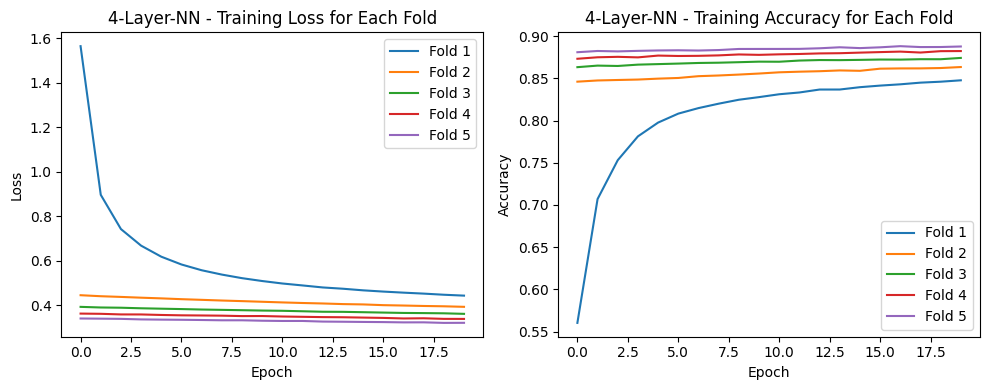

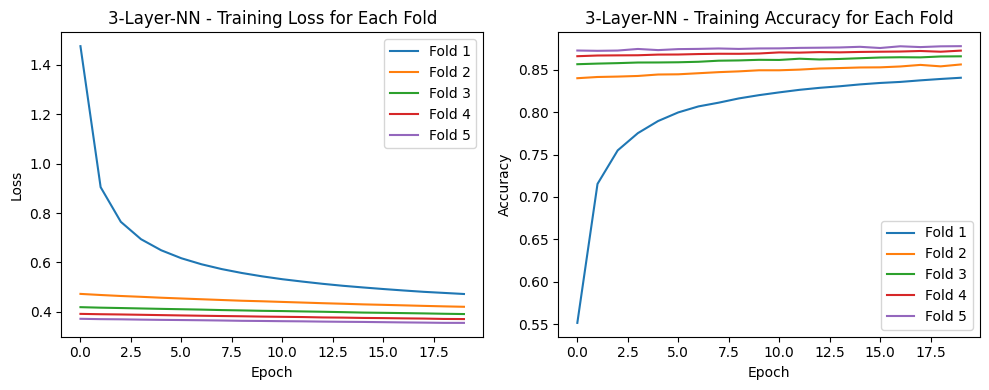

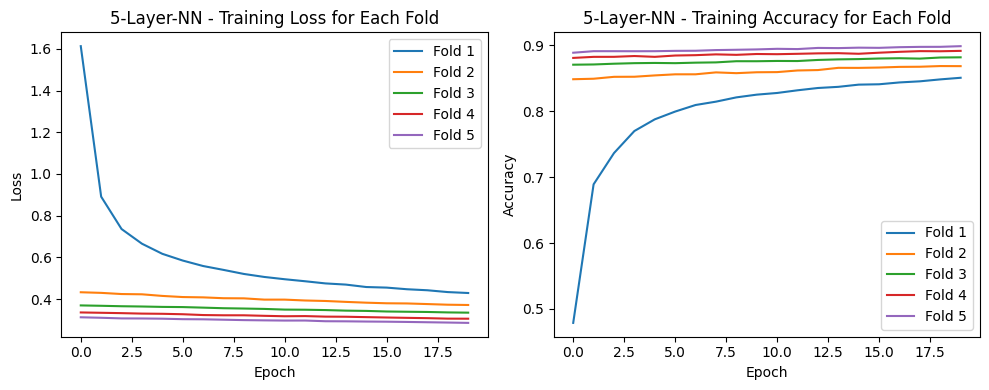

In [235]:
# Comapring the Accuracy and losses for training over 3L, 4L and 5L models by plotting the same.

plot_Training_Accuracy_And_Losses(train_accuracy, train_losses, '4-Layer-NN')
plot_Training_Accuracy_And_Losses(train_accuracy_3l, train_losses_3l, '3-Layer-NN')
plot_Training_Accuracy_And_Losses(train_accuracy_5l, train_losses_5l, '5-Layer-NN')

Validation: Losses for 5 Folds
[0.4532544016838074, 0.39059939980506897, 0.37025150656700134, 0.3463229835033417, 0.334875226020813]
Validation: Accuracy for 5 Folds
[0.8403333425521851, 0.8666666746139526, 0.8738333582878113, 0.8764166831970215, 0.8820000290870667]
Validation: Losses for 5 Folds
[0.4830736517906189, 0.4198196232318878, 0.3967052400112152, 0.37949618697166443, 0.36364543437957764]
Validation: Accuracy for 5 Folds
[0.8340833187103271, 0.856333315372467, 0.8653333187103271, 0.8681666851043701, 0.8721666932106018]
Validation: Losses for 5 Folds
[0.45642367005348206, 0.367402583360672, 0.3848024606704712, 0.3416123390197754, 0.30652743577957153]
Validation: Accuracy for 5 Folds
[0.8410833477973938, 0.8737499713897705, 0.862500011920929, 0.8769999742507935, 0.8884166479110718]


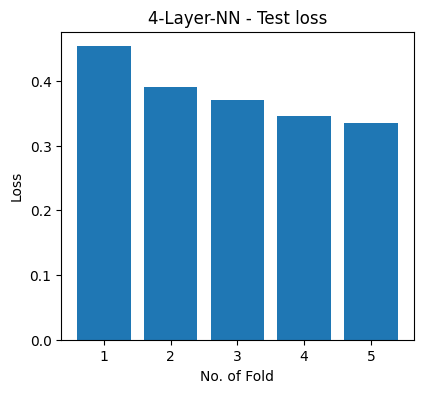

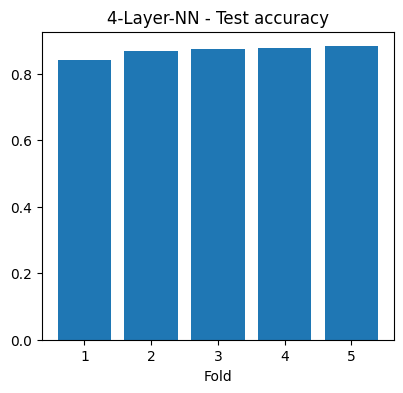

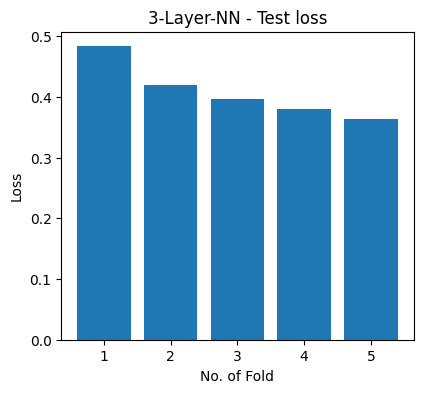

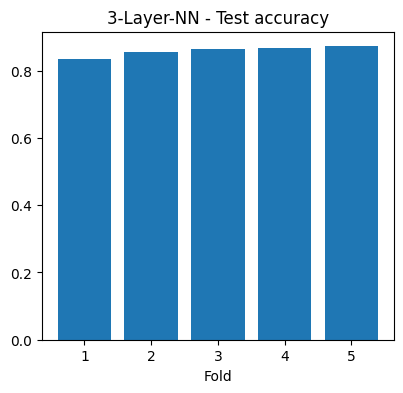

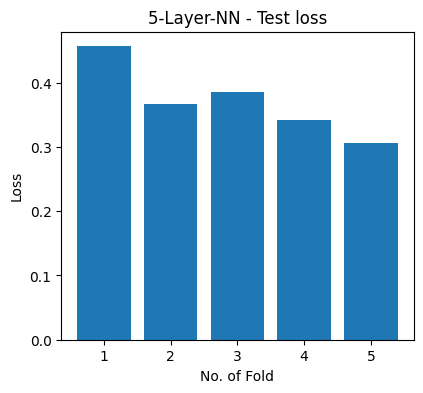

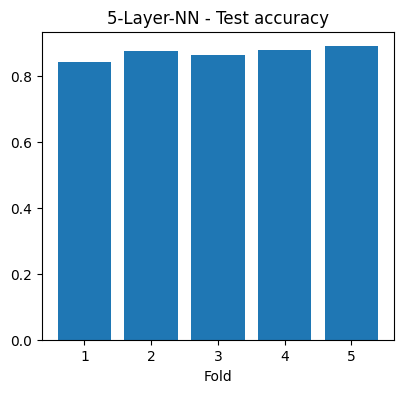

In [236]:
# Comapring the Accuracy and losses for Test/Validation data over 3L, 4L and 5L models by plotting the same.
plot_Test_Accuracy_And_Losses(test_accuracy, test_losses, '4-Layer-NN')
plot_Test_Accuracy_And_Losses(test_accuracy_3l, test_losses_3l, '3-Layer-NN')
plot_Test_Accuracy_And_Losses(test_accuracy_5l, test_losses_5l, '5-Layer-NN')

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



In [237]:
##---------Type the code below this line------------------##
# 9.1: Define the model with Dropout layer of ratio 0.25
# We added a dropout layer after the first hidden layer. Dropout helps prevent overfitting by randomly dropping out (setting to zero)
# a fraction of the input units during training, forcing the network to learn more robust and generalized representations.
model_dropout = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='flatten_input'),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, name='input_to_hidden1'),
    tf.keras.layers.Dropout(0.25),  # Add dropout layer with a dropout rate of 0.25
    tf.keras.layers.Dense(128, activation=tf.nn.relu, name='hidden1_to_hidden2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output'),
])

# Print the model summary
print(model_dropout.summary())

# Compile the model using SGD optimizers
model_dropout.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
train_losses_d, train_accuracy_d, test_losses_d, test_accuracy_d = nn_model_training(model_dropout)


Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_input (Flatten)     (None, 784)               0         
                                                                 
 input_to_hidden1 (Dense)    (None, 128)               100480    
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 hidden1_to_hidden2 (Dense)  (None, 128)               16512     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None
Fold: 1
Epoch 1/20
188/188 [==============

In [238]:
# 9.2: Define the model with Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.
# We added 2 dropout layers after the second and third hidden layer and applied L2 regularization to both dense layers with a regularization factor of 1e-04.
# Both dropout and L2 regularization help to prevent overfitting by introducing a form of regularization during training

model_dropout_na = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='flatten_input'),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, name='input_to_hidden1'),
    tf.keras.layers.Dropout(0.25),  # Add dropout layer with a dropout rate of 0.25
    tf.keras.layers.Dense(128, activation=tf.nn.relu, name='hidden1_to_hidden2'),
    tf.keras.layers.Dropout(0.25),  # Add dropout layer with a dropout rate of 0.25
    tf.keras.layers.Dense(10, activation='softmax', name='output'),
])

# Add L2 regularization to the dense layers
model_dropout_na.layers[2].kernel_regularizer = tf.keras.regularizers.l2(1e-04)
model_dropout_na.layers[4].kernel_regularizer = tf.keras.regularizers.l2(1e-04)

# Compile the model using SGD optimizers
model_dropout_na.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(model_dropout_na.summary())

# Train the model
train_losses_dna, train_accuracy_dna, test_losses_dna, test_accuracy_dna = nn_model_training(model_dropout_na)


Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_input (Flatten)     (None, 784)               0         
                                                                 
 input_to_hidden1 (Dense)    (None, 128)               100480    
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 hidden1_to_hidden2 (Dense)  (None, 128)               16512     
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-t

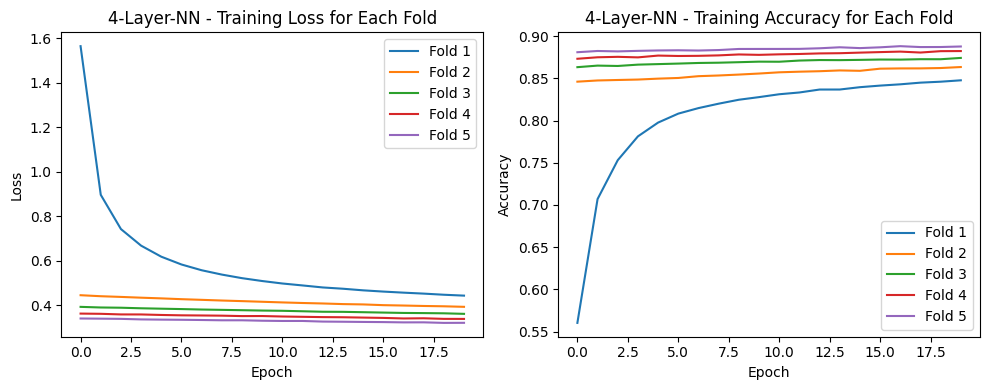

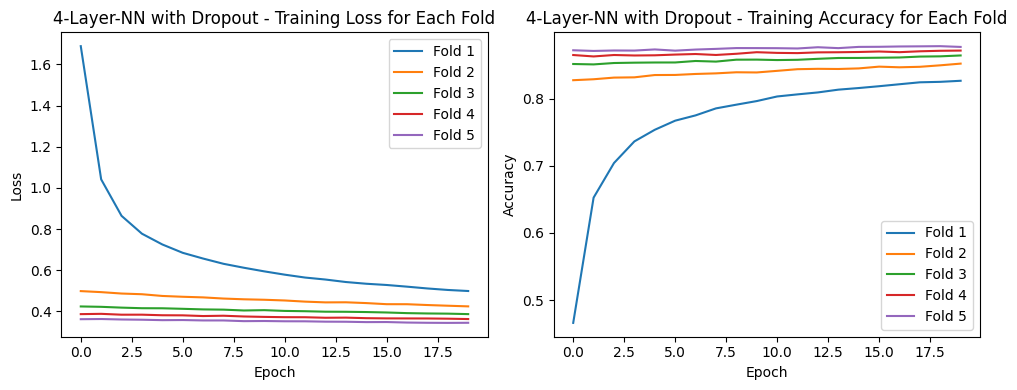

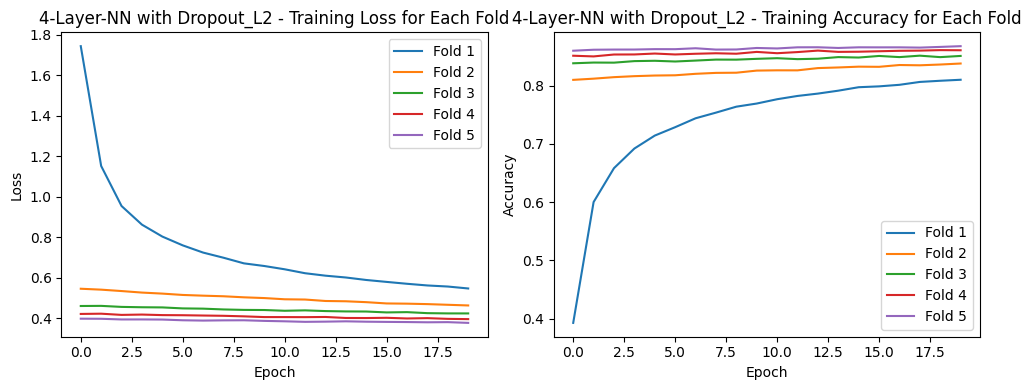

In [239]:
# Comapring the Accuracy and losses for Training data over 3L, 4L and 5L models by plotting the same.
plot_Training_Accuracy_And_Losses(train_accuracy, train_losses, '4-Layer-NN')
plot_Training_Accuracy_And_Losses(train_accuracy_d, train_losses_d, '4-Layer-NN with Dropout')
plot_Training_Accuracy_And_Losses(train_accuracy_dna, train_losses_dna, '4-Layer-NN with Dropout_L2')

Validation: Losses for 5 Folds
[0.4532544016838074, 0.39059939980506897, 0.37025150656700134, 0.3463229835033417, 0.334875226020813]
Validation: Accuracy for 5 Folds
[0.8403333425521851, 0.8666666746139526, 0.8738333582878113, 0.8764166831970215, 0.8820000290870667]
Validation: Losses for 5 Folds
[0.4715025722980499, 0.39271625876426697, 0.35928934812545776, 0.3390321135520935, 0.3240411579608917]
Validation: Accuracy for 5 Folds
[0.8356666564941406, 0.8598333597183228, 0.8703333139419556, 0.878333330154419, 0.8832499980926514]
Validation: Losses for 5 Folds
[0.4832703471183777, 0.3989890217781067, 0.3702585995197296, 0.3521227240562439, 0.33296287059783936]
Validation: Accuracy for 5 Folds
[0.831166684627533, 0.8611666560173035, 0.8667500019073486, 0.8733333349227905, 0.8785833120346069]


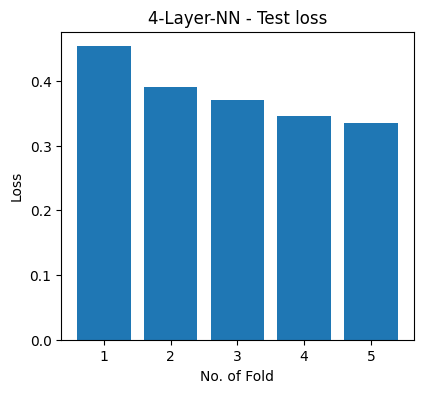

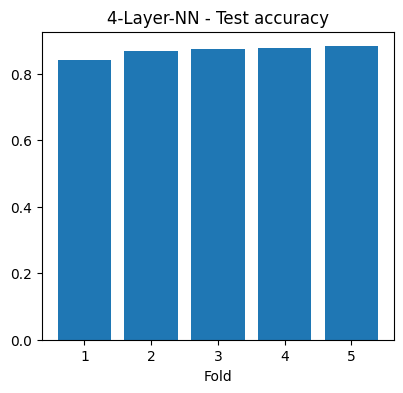

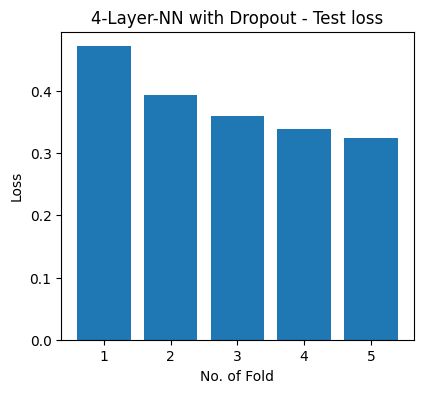

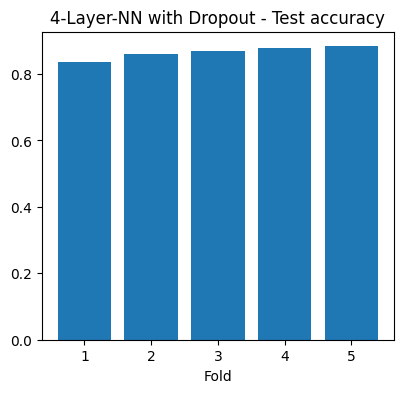

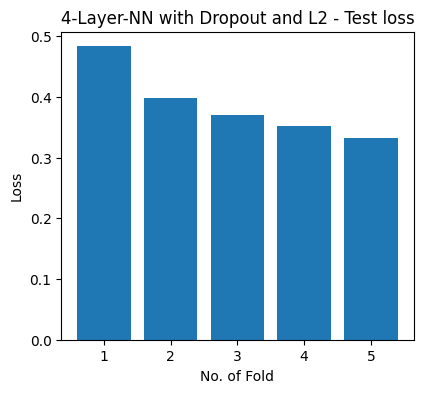

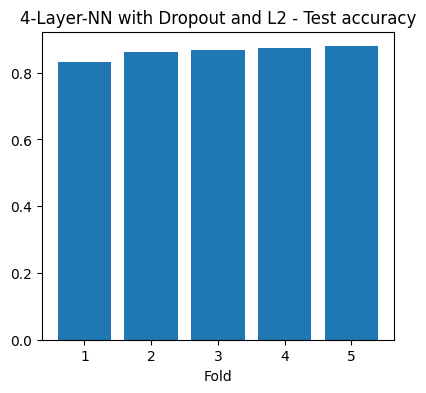

In [240]:
# Comapring the Accuracy and losses for Test/Validation data over 4L, 4L-dropout and 4L-dropout with L2 regularization models by plotting the same.
plot_Test_Accuracy_And_Losses(test_accuracy, test_losses, '4-Layer-NN')
plot_Test_Accuracy_And_Losses(test_accuracy_d, test_losses_d, '4-Layer-NN with Dropout')
plot_Test_Accuracy_And_Losses(test_accuracy_dna, test_losses_dna, '4-Layer-NN with Dropout and L2')

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


In [241]:
##---------Type the code below this line------------------##
# 10.1: Using RMS prop
model_RMS = tf.keras.Sequential([
    # Convert the 28x28 image into a flat vector of 28x28 = 784 values
    tf.keras.layers.Flatten(input_shape=(28, 28), name='flatten_input'),
    # Create a "hidden" layer with 128 neurons and apply the ReLU non-linearity
    tf.keras.layers.Dense(128, activation=tf.nn.relu, name='input_to_hidden1'),
    # Create another hidden layer with 128 neurons
    tf.keras.layers.Dense(128, activation=tf.nn.relu, name='hidden1_to_hidden2'),
    # Create an "output layer" with 10 neurons
    tf.keras.layers.Dense(10, activation='softmax', name='output'),
])

print(model_RMS.summary())
# Define optimizer RMSprop with learning_rate = 0.001 rho= 0.9
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

# Compile the model with the RMSprop
model_RMS.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
train_losses_RMS, train_accuracy_RMS, test_losses_RMS, test_accuracy_RMS = nn_model_training(model_RMS)

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_input (Flatten)     (None, 784)               0         
                                                                 
 input_to_hidden1 (Dense)    (None, 128)               100480    
                                                                 
 hidden1_to_hidden2 (Dense)  (None, 128)               16512     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None
Fold: 1
Epoch 1/20
188/188 [==============================] - 3s 7ms/step - loss: 0.6728 - accuracy: 0.7635 - val_loss: 0.5112 - val_accuracy: 0.8165
Epoch 2/20
188/188 [====

In [242]:
# 10.2: Using Adam
model_Adam = tf.keras.Sequential([
    # Convert the 28x28 image into a flat vector of 28x28 = 784 values
    tf.keras.layers.Flatten(input_shape=(28, 28), name='flatten_input'),
    # Create a "hidden" layer with 128 neurons and apply the ReLU non-linearity
    tf.keras.layers.Dense(128, activation=tf.nn.relu, name='input_to_hidden1'),
    # Create another hidden layer with 128 neurons
    tf.keras.layers.Dense(128, activation=tf.nn.relu, name='hidden1_to_hidden2'),
    # Create an "output layer" with 10 neurons
    tf.keras.layers.Dense(10, activation='softmax', name='output'),
])

# Define the optimizer Adam with learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

#print the model summary
print(model_Adam.summary())

# Compile the model with the Adam optimizer
model_Adam.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
train_losses_Adam, train_accuracy_Adam, test_losses_Adam, test_accuracy_Adam = nn_model_training(model_Adam)

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_input (Flatten)     (None, 784)               0         
                                                                 
 input_to_hidden1 (Dense)    (None, 128)               100480    
                                                                 
 hidden1_to_hidden2 (Dense)  (None, 128)               16512     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None
Fold: 1
Epoch 1/20
188/188 [==============================] - 2s 5ms/step - loss: 0.6298 - accuracy: 0.7827 - val_loss: 0.4474 - val_accuracy: 0.8421
Epoch 2/20
188/188 [====

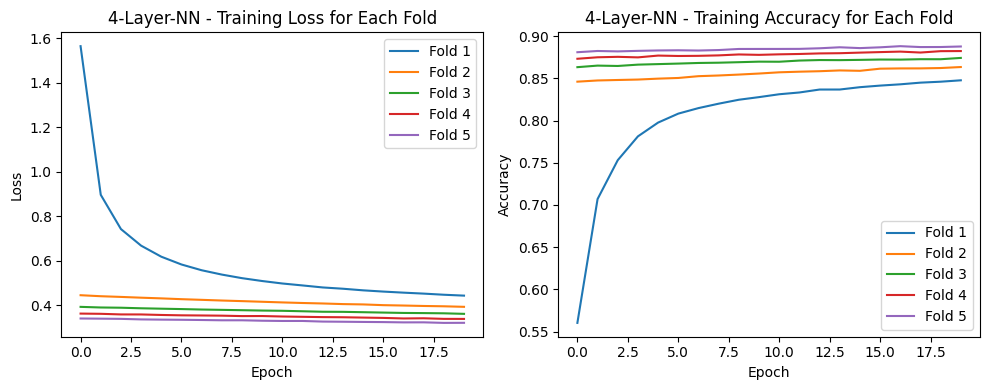

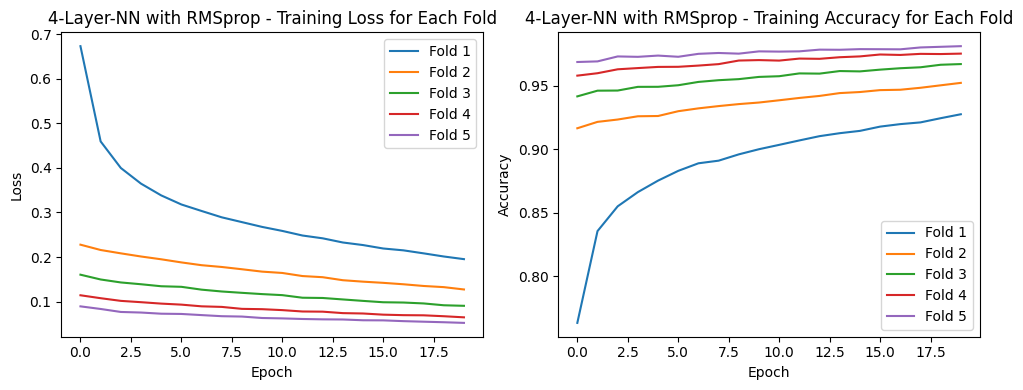

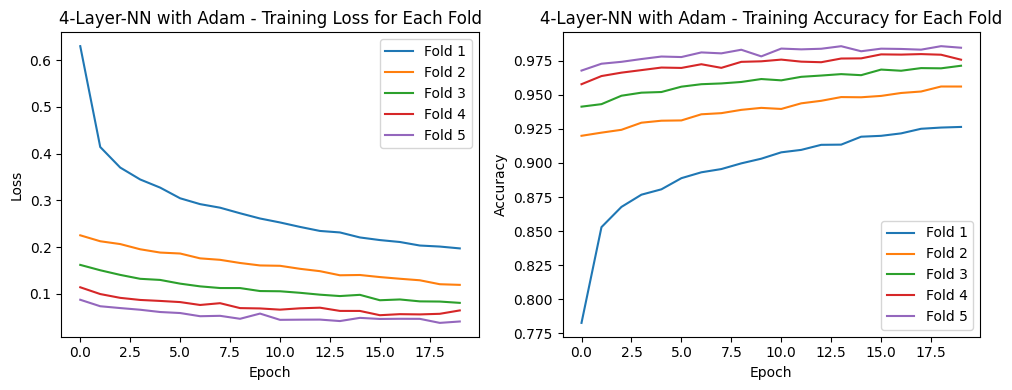

In [243]:
# Comapring the Accuracy and losses for Training data over 4L, 4L-RMSprop and 4L-Adam models by plotting the same.
plot_Training_Accuracy_And_Losses(train_accuracy, train_losses, '4-Layer-NN')
plot_Training_Accuracy_And_Losses(train_accuracy_RMS, train_losses_RMS, '4-Layer-NN with RMSprop')
plot_Training_Accuracy_And_Losses(train_accuracy_Adam, train_losses_Adam, '4-Layer-NN with Adam')

Validation: Losses for 5 Folds
[0.4532544016838074, 0.39059939980506897, 0.37025150656700134, 0.3463229835033417, 0.334875226020813]
Validation: Accuracy for 5 Folds
[0.8403333425521851, 0.8666666746139526, 0.8738333582878113, 0.8764166831970215, 0.8820000290870667]
Validation: Losses for 5 Folds
[0.36758825182914734, 0.2577742040157318, 0.19791004061698914, 0.1423388421535492, 0.09817355126142502]
Validation: Accuracy for 5 Folds
[0.8785833120346069, 0.9121666550636292, 0.9305833578109741, 0.9517499804496765, 0.9628333449363708]
Validation: Losses for 5 Folds
[0.3462289273738861, 0.2481851428747177, 0.17797067761421204, 0.11947911232709885, 0.08670651912689209]
Validation: Accuracy for 5 Folds
[0.8870000243186951, 0.9143333435058594, 0.9351666569709778, 0.9568333625793457, 0.968666672706604]


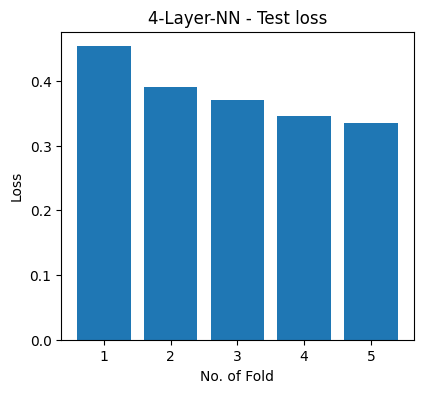

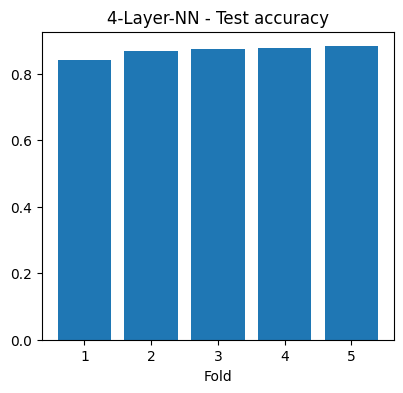

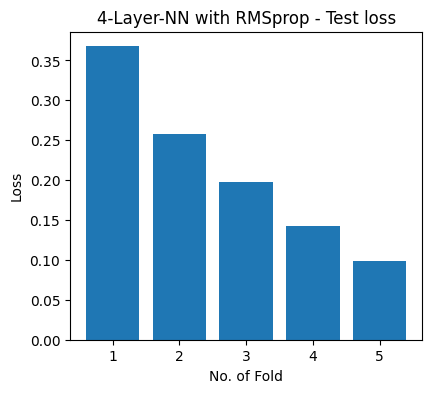

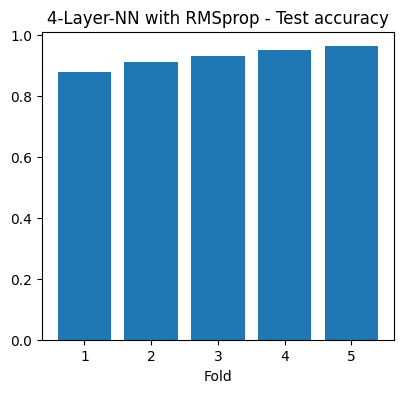

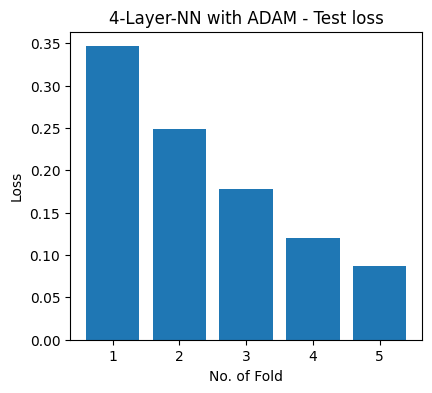

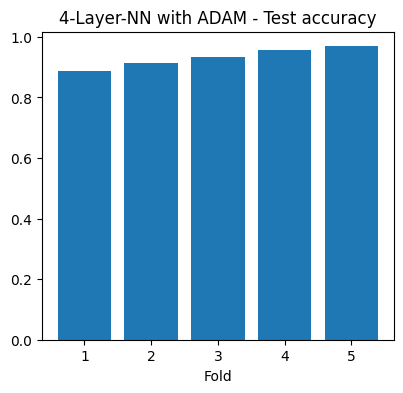

In [244]:
# Comapring the Accuracy and losses for Test/Validation data over 4L, 4L-RMSprop and 4L-Adam models by plotting the same.
plot_Test_Accuracy_And_Losses(test_accuracy, test_losses, '4-Layer-NN')
plot_Test_Accuracy_And_Losses(test_accuracy_RMS, test_losses_RMS, '4-Layer-NN with RMSprop')
plot_Test_Accuracy_And_Losses(test_accuracy_Adam, test_losses_Adam, '4-Layer-NN with ADAM')

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


In [245]:
##---------Type the code below this line------------------##
#Justification provided in below textbox

**Comparision:**

After comparing the above models, below are the accuracy achieved.
1. 4-layer NN,
2. 3-layer NN,
3. 5 layer NN,
4. 4L-with dropout
5. 4L-with dropout and L2,
6. 4L with RMSprop
7. 4L-with Adam
We see that ADAM gives the best accuracy for our dataset- 96.9%.

Since Adam combines the benefits of two other popular optimizers: AdaGrad and RMSProp. It dynamically adapts the learning rate for each parameter in the network based on the magnitude of the gradients and the historical information of the gradients. This adaptive learning rate can be beneficial for training neural networks, as it allows the optimizer to handle different parameter updates effectively.

The Fashion MNIST dataset contains grayscale images, which are relatively simple compared to more complex image recognition tasks. As a result, the gradients computed during training may exhibit sparsity. Adam's adaptive learning rate mechanism helps handle sparse gradients more efficiently
The hyperparameters used in the Adam optimizer, such as the learning rate, beta_1, beta_2, and epsilon, also helped in increasing performance.These hyperparameters balance the trade-off between convergence speed and stability.

### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck